In [1]:
%pylab inline
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randn
from pandas import Series, DataFrame

Populating the interactive namespace from numpy and matplotlib


# Figure 与 Subplot

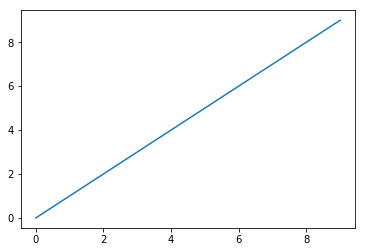

In [2]:
plot(np.arange(10))

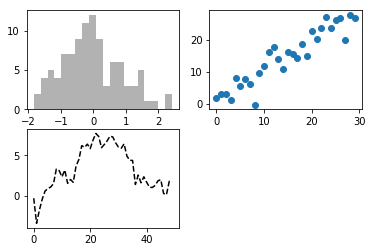

In [70]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax3.plot(randn(50).cumsum(), 'k--')
ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

In [36]:
plt.close('all')

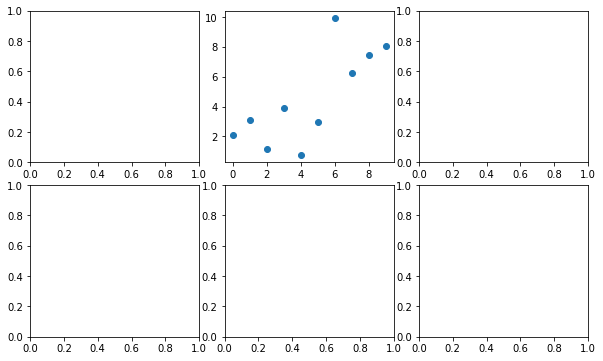

In [57]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
fig.subplots_adjust(wspace=0.15, hspace=0.15)
axes[0, 1].scatter(np.arange(10), np.arange(10) + 3 * randn(10))

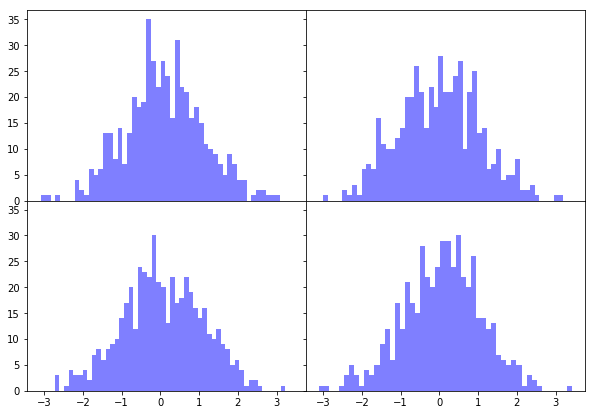

In [67]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 7))
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='b', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

# 颜色、标记和线形

In [71]:
ax.plot(x, y, 'g--')
ax.plot(x, y, linestyle='--', color='g')

NameError: name 'ax' is not defined

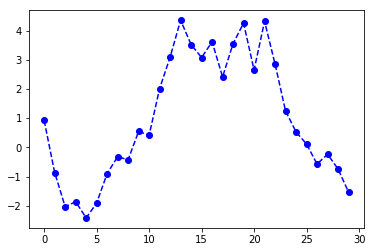

In [78]:
plt.plot(randn(30).cumsum(), 'bo--')

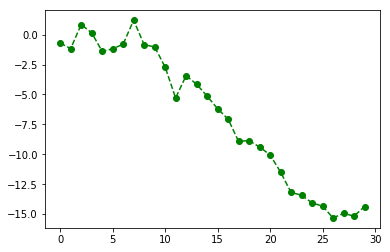

In [84]:
plt.plot(randn(30).cumsum(), color='g', linestyle='dashed', marker='o')

In [85]:
data = randn(30).cumsum()

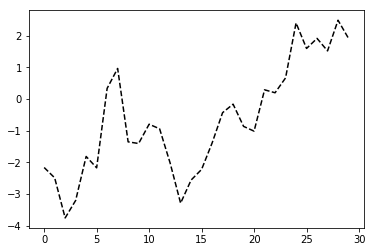

In [88]:
plt.plot(data, 'k--', label='Default')

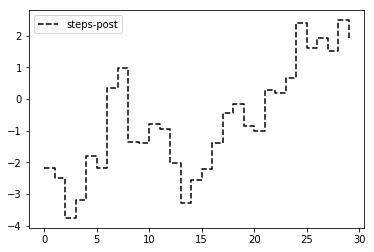

In [93]:
plt.plot(data, 'k--', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

# 刻度、标签和图例

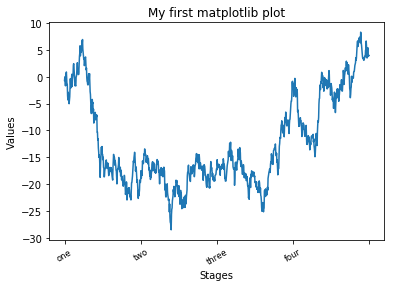

In [102]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four'], rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
ax.set_ylabel('Values')

ax.plot(randn(1000).cumsum())

# 添加图例

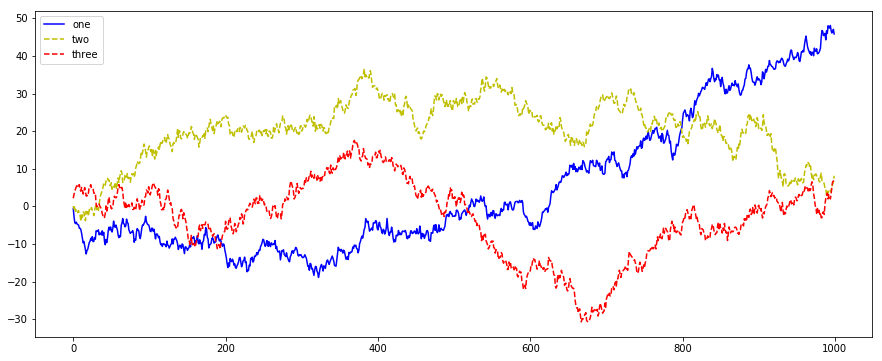

In [125]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(randn(1000).cumsum(), 'b', label='one')
ax.plot(randn(1000).cumsum(), 'y--', label='two')
ax.plot(randn(1000).cumsum(), 'r--', label='three')

ax.legend(loc='best')

# 注解以及在Subplot上绘图

In [127]:
ax.text(x,y, 'Hello World!', family='monospace', fontsize=10)

NameError: name 'x' is not defined

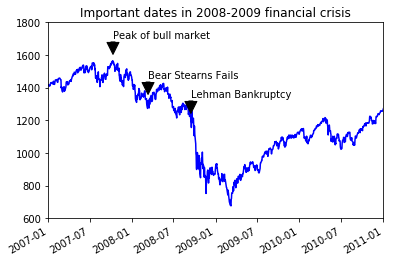

In [130]:
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='b-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# 放大到2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

## 图形的绘制

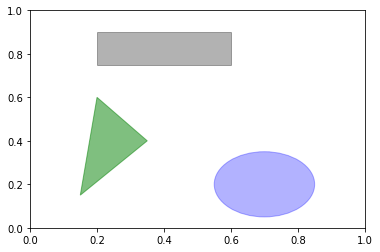

In [137]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [142]:
fig.savefig('first.png', dpi=400, bbox_inches='tight')

# 将图表保存到文件

In [143]:
plt.savefig('test.png', dpi=400, bbox_inches='tight')

# Pandas 中的绘图函数

In [147]:
s = Series(randn(10).cumsum(), index=np.arange(0, 100, 10))

In [148]:
s

0     1.489470
10    0.791129
20    1.636809
30    2.082905
40    0.558642
50    0.802346
60    1.410057
70    1.068378
80    1.384574
90    0.481712
dtype: float64

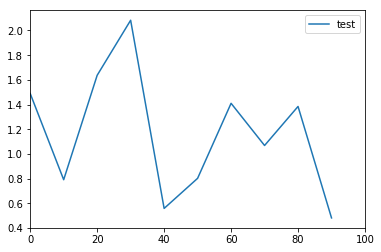

In [168]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

s.plot(ax=ax, label='test', xlim=[0, 100])
ax.legend(loc='best')

In [156]:
df = DataFrame(randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))

In [157]:
df

,A,B,C,D
0,0.131378,0.954055,0.980064,-0.703931
10,0.826988,1.641508,1.269495,-0.850149
20,-1.916810,1.481190,1.453912,-4.456043
30,-0.200047,3.355998,0.961066,-3.296692
40,-1.767525,3.667385,1.714261,-2.003564
50,-1.376124,3.795517,3.622309,-2.858385
60,-1.608450,3.007649,4.258077,-4.117932
70,-1.775046,4.846664,5.072318,-3.760470
80,-2.545027,4.933849,5.812751,-3.615900
90,-2.630096,5.636690,4.826143,-3.905961


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000268516D8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000002735EEF0>], dtype=object)

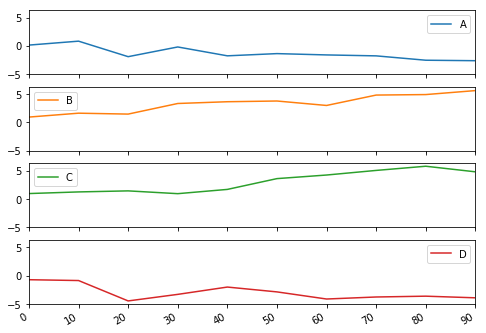

In [174]:
df.plot(subplots=True, sharex=True, sharey=True, figsize=(8, 6))

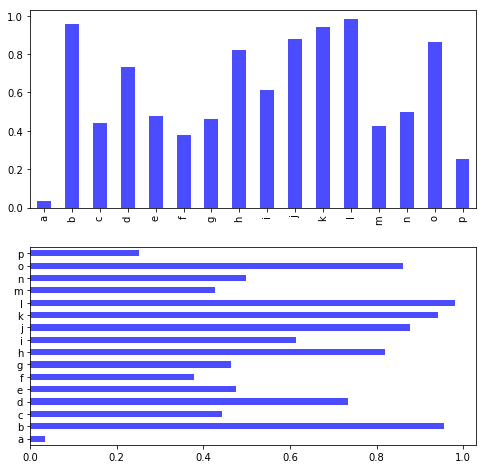

In [187]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot(kind='bar', ax=axes[0], color='b', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='b', alpha=0.7)

In [179]:
data

a    0.978620
b    0.553697
c    0.777316
d    0.273884
e    0.531091
f    0.335700
g    0.590325
h    0.533979
i    0.344743
j    0.723083
k    0.125855
l    0.565516
m    0.136536
n    0.761902
o    0.013567
p    0.844710
dtype: float64

In [180]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [181]:
df

Genus,A,B,C,D
one,0.528213,0.622734,0.696789,0.932851
two,0.826338,0.907748,0.872590,0.673929
three,0.975349,0.452660,0.834891,0.532501
four,0.281928,0.385344,0.624531,0.902751
five,0.052778,0.332554,0.901192,0.510724
six,0.839334,0.805019,0.731424,0.435408


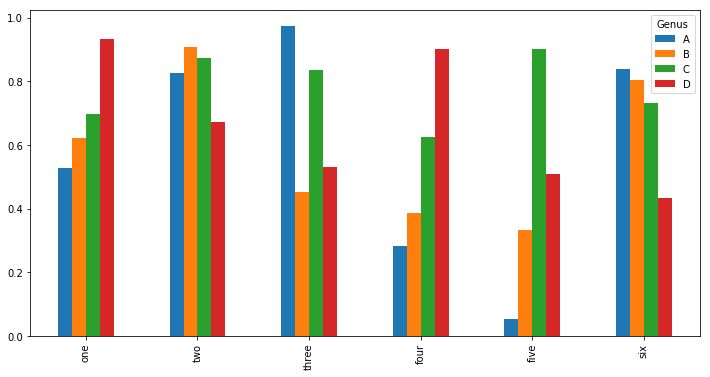

In [193]:
df.plot(kind='bar', figsize=(12, 6))

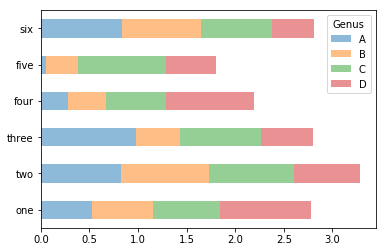

In [204]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [212]:
tips = pd.read_csv('tips.csv')

party_counts = pd.crosstab(tips.day, tips['size'])

In [213]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [216]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [217]:
party_counts = party_counts.ix[:, 2:5]

d:\root\0-soft\python2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [218]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [219]:
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)

In [220]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


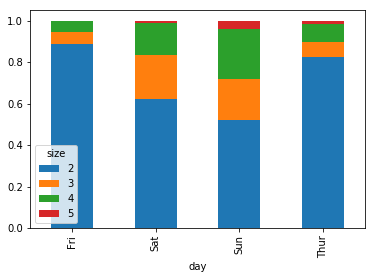

In [223]:
party_pcts.plot(kind='bar', stacked=True)

In [228]:
# 直方图和密度图

In [229]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [230]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240
6,8.77,2.00,Male,No,Sun,Dinner,2,0.228050
7,26.88,3.12,Male,No,Sun,Dinner,4,0.116071
8,15.04,1.96,Male,No,Sun,Dinner,2,0.130319
9,14.78,3.23,Male,No,Sun,Dinner,2,0.218539


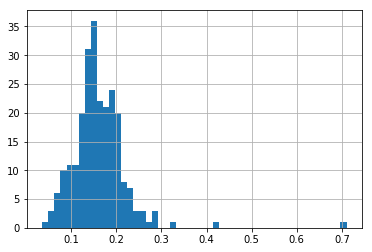

In [231]:
tips['tip_pct'].hist(bins=50)

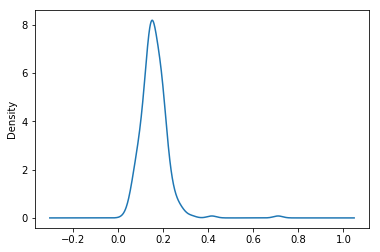

In [232]:
tips['tip_pct'].plot(kind='kde')

In [233]:
cmp1 = np.random.normal(0, 1, size=200) # N(0,1)
cmp2 = np.random.normal(10, 2, size=200) #N(10, 4)
values = Series(np.concatenate([cmp1, cmp2]))

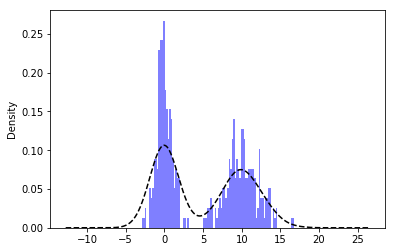

In [237]:
values.hist(bins=100, alpha=0.5, color='b', normed=True)
values.plot(kind='kde', style='k--')

# 散布图

In [244]:
macro = pd.read_csv('macrodata.csv')

In [245]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [249]:
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [252]:
np.log(data).head()

,cpi,m1,tbilrate,unemp
0,3.366606,4.939497,1.036737,1.757858
1,3.372455,4.953712,1.124930,1.629241
2,3.379293,4.945207,1.340250,1.667707
3,3.379974,4.941642,1.465568,1.722767
4,3.385745,4.938781,1.252763,1.648659


In [255]:
trans_data = np.log(data).diff().dropna()

In [257]:
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


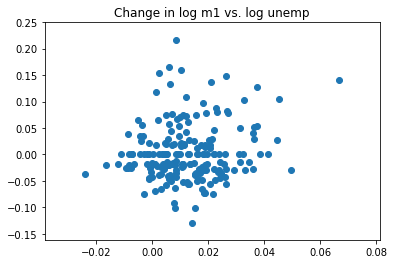

In [258]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Change in log %s vs. log %s' % ('m1', 'unemp'))

# 绘制地图：图形化显示海底地震危机数据

In [35]:
data = pd.read_csv('Haiti.csv')

In [36]:
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO


In [37]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [38]:
data['CATEGORY'][:10]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
6    4. Menaces | Security Threats, 4e. Assainissem...
7                      4. Menaces | Security Threats, 
8    2. Urgences logistiques | Vital Lines, 2f. San...
9    2. Urgences logistiques | Vital Lines, 2d. Ref...
Name: CATEGORY, dtype: object

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [40]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [41]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) & (data.LONGITUDE > -75) & (data.LONGITUDE < -70) & data.CATEGORY.notnull()]

In [42]:
len(data)

3569

# 对数据做一些规整化处理

In [61]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [62]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [63]:
data.CATEGORY.head()

0          1. Urgences | Emergency, 3. Public Health, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
6    4. Menaces | Security Threats, 4e. Assainissem...
7                      4. Menaces | Security Threats, 
Name: CATEGORY, dtype: object

In [64]:
all_cats = get_all_categories(data.CATEGORY)

In [65]:
all_cats[:10]

['1. Urgences | Emergency',
 '1a. Highly vulnerable',
 '1b. Urgence medicale | Medical Emergency',
 '1c. Personnes prises au piege | People trapped',
 '1d. Incendie | Fire',
 '2. Urgences logistiques | Vital Lines',
 "2a. Penurie d'aliments | Food Shortage",
 "2b. Penurie d'eau | Water shortage",
 '2c. Eau contaminee | Contaminated water',
 '2c. Probleme de securite | Security Concern']

In [66]:
# 生成器表达式
english_mapping = dict(get_english(x) for x in all_cats)

In [67]:
english_mapping['2a']

'Food Shortage'

In [68]:
english_mapping['6c']

'Earthquake and aftershocks'

In [85]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

In [86]:
all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index,
                        columns=code_index)

In [88]:
dummy_frame.ix[:, :6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 6 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
dtypes: float64(6)
memory usage: 355.2 KB


In [89]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1
data = data.join(dummy_frame.add_prefix('category_'))

In [91]:
data.ix[:, 10:15]

,category_1,category_1a,category_1b,category_1c,category_1d
0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0


In [93]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                    lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

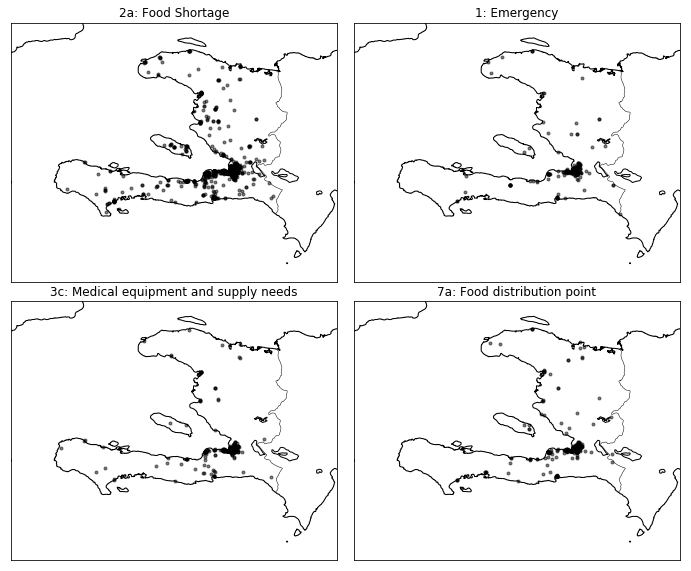

In [94]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

In [100]:
shapefile_path = 'PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path, 'roads')

(1583,
 3,
 [-72.749246, 18.409952, 0.0, 0.0],
 [-71.973789, 18.7147105, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x24c6f550>)